# Formatting commands in Matplotlib

In [1]:
# Import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Set the overall font size for the plot
The following line will set the default font size to 16 points. The default is 12 points. See the [Matplotlib documentation](https://matplotlib.org/users/dflt_style_changes.html) for details.

In [2]:
mpl.rcParams['font.size'] = 16

## Load example data

In [3]:
data = np.genfromtxt('Example-Data.csv', delimiter=',', skip_header = 1)

frequency = data[:,0]
voltage = data[:,1]
err = data[:,2]

## Define the model

In [4]:
def model(x,m,b):
    return m*x + b

## Fit the model to the data

In [5]:
# Set initial parameters m0 and b0
mInit = 2
bInit = 0

pOpt, pCov = curve_fit(model,frequency,voltage,p0=[mInit,bInit],sigma=err,absolute_sigma=True)
print("[mOpt bOpt] =", pOpt)
print()
print("pCov =")
print(pCov)

[mOpt bOpt] = [ 2.02846482 -0.94749648]

pCov =
[[ 2.70174409e-03 -1.53402709e-01]
 [-1.53402709e-01  1.14708105e+01]]


## Plot the data with the fit

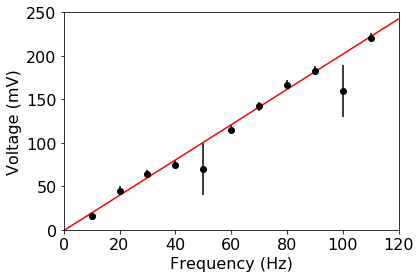

In [8]:
# Make errorbar plot of voltage versus frequency, with
# black circles ('ko') as markers
plt.errorbar(frequency,voltage,yerr=err,fmt='ko')

# Define new frequency array, fModel, for displaying the model
fModel = np.linspace(0,120,50)
plt.plot(fModel,model(fModel,pOpt[0],pOpt[1]),'r-')

# Set labels. We precede xlabel by 'r' to denote a raw string so
# the parser can recognize the LaTeX string enclosed by '$'.
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (mV)')

# Set limits for x- and y- axes
plt.xlim(0,120)
plt.ylim(0,250)

plt.show()